In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 2: Frequency Domain Analysis - Filtering

In this task, we will implement high-pass, low-pass, and band-reject filters using frequency domain analysis.

In [1]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-rhvqcds_
  Created wheel for ee604-plugins: filename=ee604_plugins-0.3.2-cp36-none-any.whl size=2311 sha256=bb69bb9b76c94669b8cc3c3d1f1ee01565365d717a76b513a0516c1138cf7bdd
  Stored in directory: /tmp/pip-ephem-wheel-cache-vew6mx0f/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-rhvqcds_


In [2]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import circle as circ

from ee604_plugins import download_dataset, cv2_imshow

download_dataset(assignment_no=3, task_no=2) # download data for this assignment

Download Complete!


In [3]:
def getFrequencyDomainSignal(img):
    '''
    Write a program to extract magnitude and phase spectrum of the input image
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    
    Outputs:
    + mag_spectrum - magnitude spectrum of size N x N
    + phase_spectrum - phase spectrum of size N x N
    
    Allowed external package:
    + You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2 
    + Just make sure you do not use any direct implementation.
    
    Hint:
    + not needed
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    dft_img = np.fft.fft2(img)
    dft_shift_img = np.fft.fftshift(dft_img)

    mag_spectrum = np.abs(dft_shift_img)
    phase_spectrum = np.angle(dft_shift_img)
    
    #############################
    # End your code here ########
    ############################# 
    
    return mag_spectrum, phase_spectrum

In [4]:
def reconstruction(mag_spectrum, phase_spectrum):
    '''
    Write a program to reconstruct the original image using its magnitude and phase spectrum
    
    Inputs:
    + mag_spectrum - magnitude spectrum of size N x N
    + phase_spectrum - phase spectrum of size N x N
    
    Outputs:
    + out_img - reconstructed image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed external package:
    + You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2 
    + Just make sure you do not use any direct implementation.
    
    Hint:
    + not needed
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    img_dft = mag_spectrum * (np.cos(phase_spectrum) + 1j * np.sin(phase_spectrum))
    recons_img = np.abs(np.fft.ifft2(img_dft))

    recons_img = np.round(((recons_img - np.min(recons_img))/np.max(recons_img))*255)
    out_img = np.uint8(recons_img)
    
    #############################
    # End your code here ########
    ############################# 
    
    return out_img

In [5]:
def applyLPF(img, fc):
    '''
    Write a program to apply an ideal low pass filter (having cutoff frequency 'fc') to the input image.
    You must use frquency domain analysis to do this.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + fc - cutoff frequency 
        - 0 < fc < sqrt(img.shape[0]*img.shape[1])/2
    
    Outputs:
    + out_img - filetered image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed external package:
    + You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2 
    + Just make sure you do not use any direct implementation.
    
    Hint:
    + use getFrequencyDomainSignal() and reconstruction()
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    H, W = img.shape
    mag, ang = getFrequencyDomainSignal(img)
    mask = np.zeros(img.shape)
    mask[(H//2)-fc:(H//2)+fc, (W//2)-fc:(W//2)+fc] = 1
    mag = mag * mask
    out_img = reconstruction(mag, ang)
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [6]:
def applyHPF(img, fc):
    '''
    Write a program to apply an ideal high pass filter (having cutoff frequency 'fc') to the input image.
    You must use frquency domain analysis to do this.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + fc - cutoff frequency 
        - 0 < fc < sqrt(img.shape[0]*img.shape[1])/2
    
    Outputs:
    + out_img - filetered image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed external package:
    + You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2 
    + Just make sure you do not use any direct implementation.
    
    Hint:
    + use getFrequencyDomainSignal() and reconstruction()
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    H, W = img.shape
    mag, ang = getFrequencyDomainSignal(img)
    mask = np.ones(img.shape)
    mask[(H//2)-fc:(H//2)+fc, (W//2)-fc:(W//2)+fc] = 0
    mag = mag * mask
    out_img = reconstruction(mag, ang)
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [7]:
def applyBandRejectFilter(img, fL, fH):
    '''
    Write a program to apply an ideal band reject filter (having cutoff frequency at 'fL' and 'fH')
    to the input image. You must use frquency domain analysis to do this.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + fL & fH - cutoff frequency 
              - 0 < fL < fH < sqrt(img.shape[0]*img.shape[1])/2
    
    Outputs:
    + out_img - filetered image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed external package:
    + You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2 
    + Just make sure you do not use any direct implementation.
    
    Hint:
    + use getFrequencyDomainSignal() and reconstruction()
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    H, W = img.shape
    mag, ang = getFrequencyDomainSignal(img)
    mask = np.ones(img.shape)
    mask[(H//2)-fH:(H//2)-fL, (W//2)-fH:(W//2)+fH] = 0
    mask[(H//2)+fL:(H//2)+fH, (W//2)-fH:(W//2)+fH] = 0
    mask[(H//2)-fH:(H//2)+fH, (W//2)-fH:(W//2)-fL] = 0
    mask[(H//2)-fH:(H//2)+fH, (W//2)+fL:(W//2)+fH] = 0
    mag = mag * mask
    out_img = reconstruction(mag, ang)
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [8]:
# Do not change codes inside this cell

lena_noisy = cv2.imread('data/lena_noisy.jpg', 0)

def plot_frame(gridx, gridy, subplot_id, img, name, axis=False):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray", vmin=0, vmax=255)
    
    if axis == False:
        plt.axis("off")
    plt.title(name)

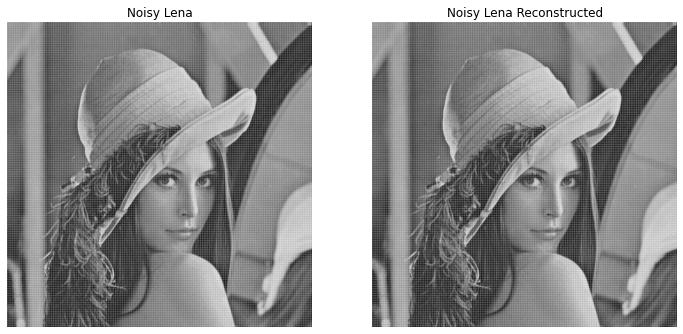

In [9]:
# Test getFrequencyDomainSignal() and reconstruction()
# Make sure the reconstructed image looks similar to the original image

mag_spectrum, phase_spectrum = getFrequencyDomainSignal(lena_noisy)
lena_reconstructed = reconstruction(mag_spectrum, phase_spectrum)

plt.figure(figsize=(12, 6))
plot_frame(1, 2, 0, lena_noisy, "Noisy Lena")
plot_frame(1, 2, 1, lena_reconstructed, "Noisy Lena Reconstructed")

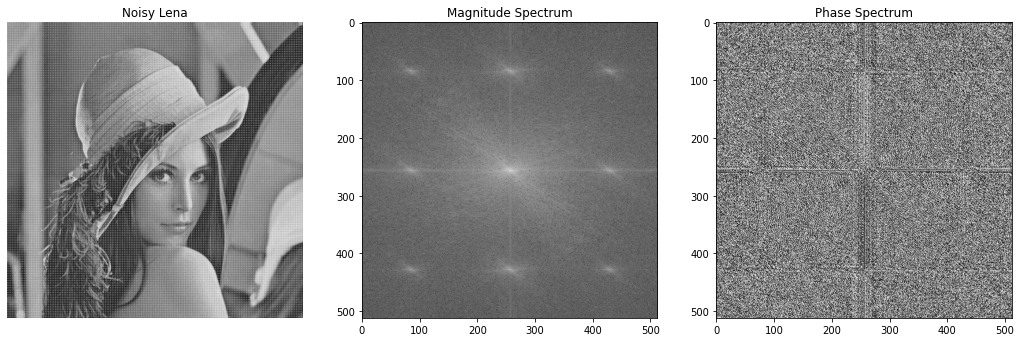

In [10]:
# Do not change codes inside this cell

mag_spectrum, phase_spectrum = getFrequencyDomainSignal(lena_noisy)

plt.figure(figsize=(18, 6))
plot_frame(1, 3, 0, lena_noisy, "Noisy Lena")

tmp = np.log(mag_spectrum)
tmp -= np.min(tmp)
if np.max(tmp) != 0:
    tmp /= np.max(tmp)
tmp *= 255
plot_frame(1, 3, 1, tmp, "Magnitude Spectrum", axis=True)

tmp = phase_spectrum
tmp -= np.min(tmp)
if np.max(tmp) != 0:
    tmp /= np.max(tmp)
tmp *= 255
plot_frame(1, 3, 2, phase_spectrum, "Phase Spectrum", axis=True)

### Find suitable fL and fH for band reject filter

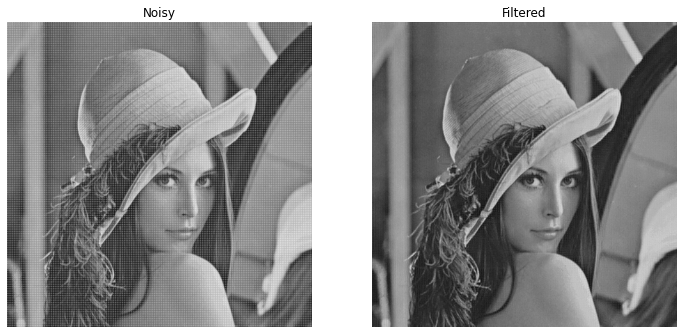

In [11]:
# Have a look at the phase and magnitude spectrum of the image and find a suitable fL and fH for
# a Band reject filter to work

def plot_BRF_output(fL, fH):
    if fL == ".....":
        fL = 1
        fH = int(lena_noisy.shape[0]/2)
        
    lena_filtered = applyBandRejectFilter(lena_noisy, fL, fH)
    plt.figure(figsize=(12, 6))
    plot_frame(1, 2, 0, lena_noisy, "Noisy")
    plot_frame(1, 2, 1, lena_filtered, "Filtered")


#############################
# Your part #################
#############################

# Replace with your value for fL and fH
fL = 156
fH = 176

plot_BRF_output(fL, fH)

### Observations

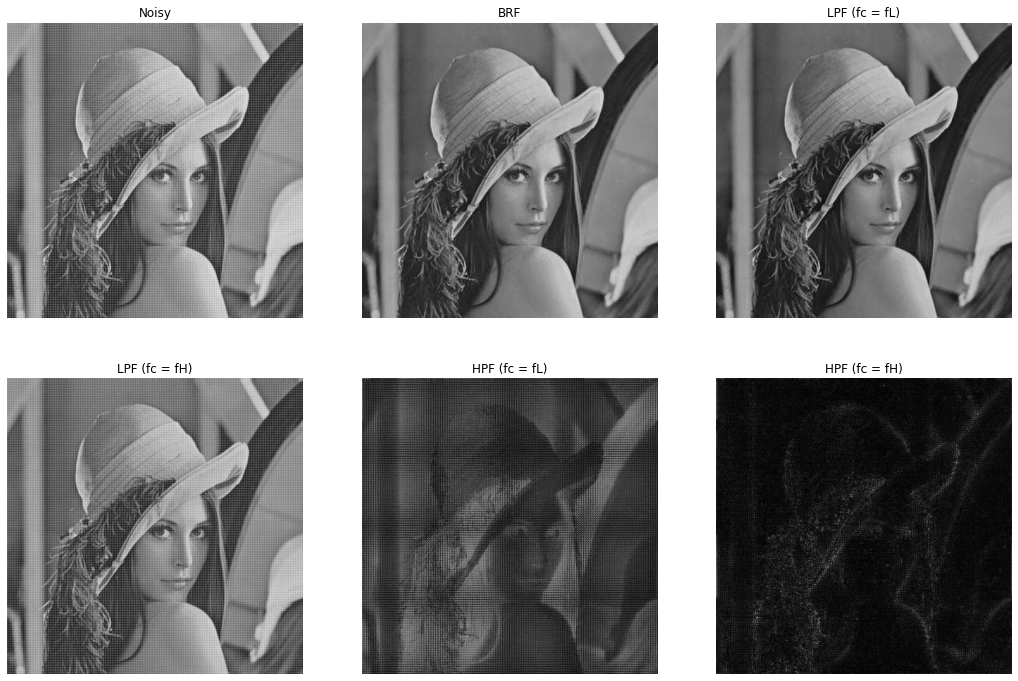

In [12]:
# Do not change codes inside this cell
# Add your observations in next cell

plt.figure(figsize=(18, 12))
plot_frame(2, 3, 0, lena_noisy, "Noisy")

tmp = applyBandRejectFilter(lena_noisy, fL, fH)
plot_frame(2, 3, 1, tmp, "BRF")

tmp = applyLPF(lena_noisy, fL)
plot_frame(2, 3, 2, tmp, "LPF (fc = fL)")

tmp = applyLPF(lena_noisy, fH)
plot_frame(2, 3, 3, tmp, "LPF (fc = fH)")

tmp = applyHPF(lena_noisy, fL)
plot_frame(2, 3, 4, tmp, "HPF (fc = fL)")

tmp = applyHPF(lena_noisy, fH)
plot_frame(2, 3, 5, tmp, "HPF (fc = fH)")

In [15]:
# Add your observations; make sure you compare all the five filtering operations done in the previous cell

your_observation = """
From above images we can infer:
1. The band reject filter rejects only the noise energy bursts from the spectrum along with preserving high as well as low frequency details of the image.
2. The low pass filter with cutoff frequency fL rejects the noise as well as all the high frequency details.
3. The low pass filter with cutoff frequency fH rejects the high frequency but does not reject the noise energy bursts.
4. The high pass filter with cutoff frequency fL rejects the low frequency components but does not reject noise energy bursts.
5. The high pass filter with cutoff frequency fH rejects all low frequency as well as noise energy bursts.
"""

print(your_observation)


From above images we can infer:
1. The band reject filter rejects only the noise energy bursts from the spectrum along with preserving high as well as low frequency details of the image.
2. The low pass filter with cutoff frequency fL rejects the noise as well as all the high frequency details.
3. The low pass filter with cutoff frequency fH rejects the high frequency but does not reject the noise energy bursts.
4. The high pass filter with cutoff frequency fL rejects the low frequency components but does not reject noise energy bursts.
5. The high pass filter with cutoff frequency fH rejects all low frequency as well as noise energy bursts.

